In [1]:
import pandas as pd 
import nltk
from   nltk.tokenize import word_tokenize,RegexpTokenizer
from   nltk.corpus  import stopwords
from   nltk.stem.wordnet import WordNetLemmatizer
from   sklearn.model_selection import train_test_split
from   sklearn.feature_extraction.text import TfidfVectorizer
from   sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,roc_curve,roc_auc_score
from  sklearn.metrics import classification_report

In [2]:
author_df = pd.read_csv('Authors_dataset.csv')
author_df.drop(columns='id',inplace = True)

In [3]:
y = author_df['author']
author_df.drop(columns = 'author',inplace = True)

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess(review):
    tokens = tokenizer.tokenize(review)
    pure_tokens = [token.lower() for token in tokens if token.lower() not in stopwords_en]
    lemma_tokens = [lemmatizer.lemmatize(pure_tokens,pos = 'v')for pure_tokens in pure_tokens]
    
    return ' '.join(lemma_tokens)
preprocess("""The sounding systems wasn't really good""")

'sound systems really good'

In [6]:
author_df['text'] =author_df['text'].apply(preprocess)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(author_df,y,test_size=0.2,random_state=1)

In [8]:
vectorizer = TfidfVectorizer()

train_df = vectorizer.fit_transform(x_train['text'])
test_df = vectorizer.transform(x_test['text'])

In [9]:
mnb = MultinomialNB()
mnb.fit(train_df,y_train)

MultinomialNB()

In [10]:
y_pred = mnb.predict(test_df)

In [11]:
cm = confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred,average='macro')

0.81174271419035

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         EAP       0.75      0.90      0.82      1530
         HPL       0.91      0.70      0.79      1144
         MWS       0.84      0.81      0.83      1242

    accuracy                           0.81      3916
   macro avg       0.83      0.80      0.81      3916
weighted avg       0.82      0.81      0.81      3916



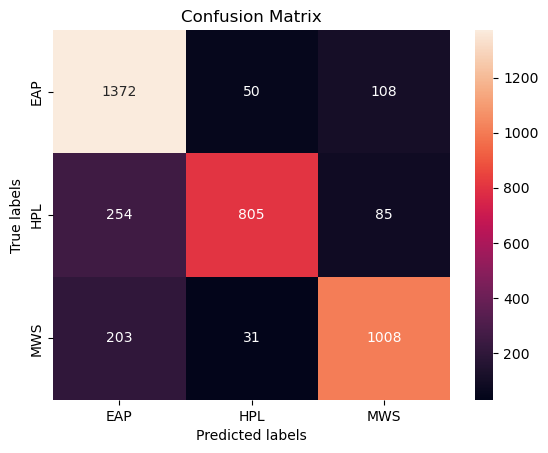

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['EAP', 'HPL','MWS']); ax.yaxis.set_ticklabels(['EAP', 'HPL','MWS']);

In [14]:
accuracy_score(y_test,y_pred)

0.8133299284984679